In [1]:
import pandas as pd

scholar_data = pd.read_excel('学者撰写的论文摘要.xlsx')
ai_data = pd.read_excel('AI生成的论文摘要.xlsx')

scholar_abstracts = scholar_data['论文摘要']
ai_abstracts = ai_data['论文摘要']

def calculate_abstract_lengths(abstracts):
    lengths = [len(str(abstract)) for abstract in abstracts]
    return lengths

scholar_lengths = calculate_abstract_lengths(scholar_abstracts)
ai_lengths = calculate_abstract_lengths(ai_abstracts)

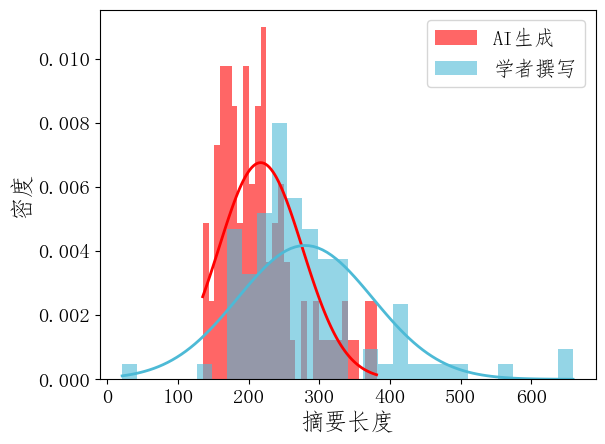

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as norm
import matplotlib

matplotlib.rc("font",family='FangSong')

# 绘制直方图
plt.hist(ai_lengths, bins=30, density=True, alpha=0.6, color='r', label='AI生成')
plt.hist(scholar_lengths, bins=30, density=True, alpha=0.6, color='#4DBAD6', label='学者撰写')

# 拟合正态分布曲线并绘制
mu, sigma = norm.norm.fit(ai_lengths)
x = np.linspace(min(ai_lengths), max(ai_lengths), 100)
p = norm.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)

mu, sigma = norm.norm.fit(scholar_lengths)
x = np.linspace(min(scholar_lengths), max(scholar_lengths), 100)
p = norm.norm.pdf(x, mu, sigma)
plt.plot(x, p, '#4DBAD6', linewidth=2)


# 添加标签和图例
plt.xlabel('摘要长度', fontsize = 17)
plt.ylabel('密度', fontsize = 17)
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# 显示图形
plt.show()


In [4]:
# 输出两个样本的均值和标准差
print('AI生成的论文摘要长度均值：', np.mean(ai_lengths))
print('AI生成的论文摘要长度标准差：', np.std(ai_lengths))
print('学者撰写的论文摘要长度均值：', np.mean(scholar_lengths))
print('学者撰写的论文摘要长度标准差：', np.std(scholar_lengths))

AI生成的论文摘要长度均值： 217.0
AI生成的论文摘要长度标准差： 59.04828532650207
学者撰写的论文摘要长度均值： 279.93
学者撰写的论文摘要长度标准差： 95.59898064310099


C:\Users\60938\AppData\Local\Temp\ipykernel_19820\2561166263.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ai_lengths, scholar_lengths], labels=['AI生成', '学者撰写'])
C:\Users\60938\AppData\Local\Temp\ipykernel_19820\2561166263.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 15)


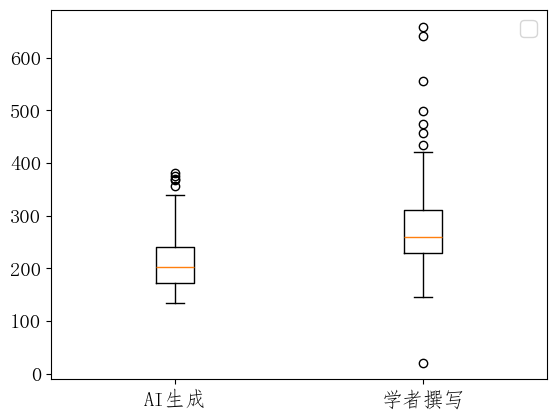

AI生成的论文摘要长度最大值： 381
AI生成的论文摘要长度最小值： 135
AI生成的论文摘要长度极差： 246
学者撰写的论文摘要长度最大值： 659
学者撰写的论文摘要长度最小值： 21
学者撰写的论文摘要长度极差： 638


In [5]:
# 绘制长度箱线图以及最大最小值与极差
plt.boxplot([ai_lengths, scholar_lengths], labels=['AI生成', '学者撰写'])
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()
print('AI生成的论文摘要长度最大值：', max(ai_lengths))
print('AI生成的论文摘要长度最小值：', min(ai_lengths))
print('AI生成的论文摘要长度极差：', max(ai_lengths) - min(ai_lengths))
print('学者撰写的论文摘要长度最大值：', max(scholar_lengths))
print('学者撰写的论文摘要长度最小值：', min(scholar_lengths))
print('学者撰写的论文摘要长度极差：', max(scholar_lengths) - min(scholar_lengths))

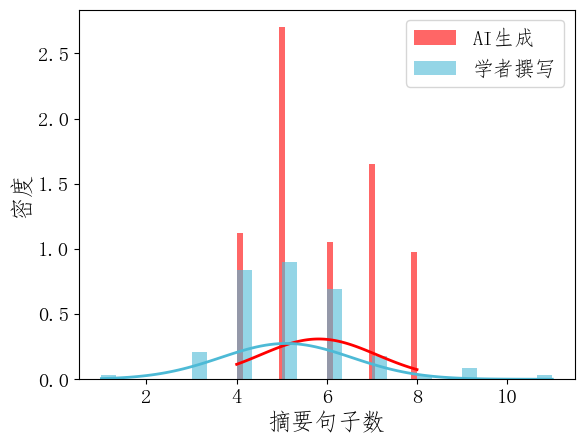

In [6]:
# 分析句子数量，以句号分隔

def calculate_sentence_numbers(abstracts):
    numbers = [len(str(abstract).split('。')) for abstract in abstracts]
    return numbers

scholar_sentence_numbers = calculate_sentence_numbers(scholar_abstracts)
ai_sentence_numbers = calculate_sentence_numbers(ai_abstracts)

# 绘制直方图
plt.hist(ai_sentence_numbers, bins=30, density=True, alpha=0.6, color='r', label='AI生成')
plt.hist(scholar_sentence_numbers, bins=30, density=True, alpha=0.6, color='#4DBAD6', label='学者撰写')

# 拟合正态分布曲线并绘制
mu, sigma = norm.norm.fit(ai_sentence_numbers)
x = np.linspace(min(ai_sentence_numbers), max(ai_sentence_numbers), 100)
p = norm.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)

mu, sigma = norm.norm.fit(scholar_sentence_numbers)
x = np.linspace(min(scholar_sentence_numbers), max(scholar_sentence_numbers), 100)
p = norm.norm.pdf(x, mu, sigma)
plt.plot(x, p, '#4DBAD6', linewidth=2)


# 添加标签和图例
plt.xlabel('摘要句子数', fontsize = 17)
plt.ylabel('密度', fontsize = 17)
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# 显示图形
plt.show()

In [7]:
# 输出均方差，偏态与峰度
print('AI生成的论文摘要句子数偏态：', norm.skew(ai_sentence_numbers))
print('AI生成的论文摘要句子数峰度：', norm.kurtosis(ai_sentence_numbers))

print('学者撰写的论文摘要句子数偏态：', norm.skew(scholar_sentence_numbers))
print('学者撰写的论文摘要句子数峰度：', norm.kurtosis(scholar_sentence_numbers))

AI生成的论文摘要句子数偏态： 0.2815629616282395
AI生成的论文摘要句子数峰度： -1.140404271185494
学者撰写的论文摘要句子数偏态： 0.9611895921138304
学者撰写的论文摘要句子数峰度： 2.6815660025605883


C:\Users\60938\AppData\Local\Temp\ipykernel_19820\1378934864.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ai_sentence_numbers, scholar_sentence_numbers], labels=['AI生成', '学者撰写'])
C:\Users\60938\AppData\Local\Temp\ipykernel_19820\1378934864.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize = 15)


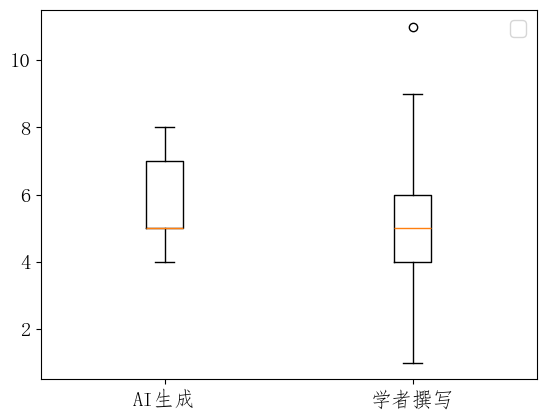

AI生成的论文摘要句子数最大值： 8
AI生成的论文摘要句子数最小值： 4
AI生成的论文摘要句子数极差： 4
学者撰写的论文摘要句子数最大值： 11
学者撰写的论文摘要句子数最小值： 1
学者撰写的论文摘要句子数极差： 10


In [8]:
# 绘制箱线图并输出各类指标

plt.boxplot([ai_sentence_numbers, scholar_sentence_numbers], labels=['AI生成', '学者撰写'])
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

print('AI生成的论文摘要句子数最大值：', max(ai_sentence_numbers))
print('AI生成的论文摘要句子数最小值：', min(ai_sentence_numbers))
print('AI生成的论文摘要句子数极差：', max(ai_sentence_numbers) - min(ai_sentence_numbers))
print('学者撰写的论文摘要句子数最大值：', max(scholar_sentence_numbers))
print('学者撰写的论文摘要句子数最小值：', min(scholar_sentence_numbers))
print('学者撰写的论文摘要句子数极差：', max(scholar_sentence_numbers) - min(scholar_sentence_numbers))